In [ ]:
!pip install dgl
!pip install kora -q
import kora.install.rdkit
from torch import nn

     |████████████████████████████████| 4.4MB 32.3MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 9.9MB/s 


In [ ]:
import dgl
import numpy as np

def build_karate_club_graph():
    # All 78 edges are stored in two numpy arrays. One for source endpoints
    # while the other for destination endpoints.
    src = np.array([1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10,
        10, 11, 12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21,
        25, 25, 27, 27, 27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33,
        33, 33, 33, 33, 33, 33, 33, 33, 33, 33])
    dst = np.array([0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4,
        5, 0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23,
        24, 2, 23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23,
        29, 30, 31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30,
        31, 32])
    # Edges are directional in DGL; Make them bi-directional.
    u = np.concatenate([src, dst])
    v = np.concatenate([dst, src])
    print("v",v)
    # Construct a DGLGraph
    return dgl.graph((u, v))

DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


In [ ]:
G = build_karate_club_graph()
print('We have %d nodes.' % G.number_of_nodes())
print('We have %d edges.' % G.number_of_edges())

v [ 0  0  1  0  1  2  0  0  0  4  5  0  1  2  3  0  2  2  0  4  5  0  0  3
  0  1  2  3  5  6  0  1  0  1  0  1 23 24  2 23 24  2 23 26  1  8  0 24
 25 28  2  8 14 15 18 20 22 23 29 30 31  8  9 13 14 15 18 19 20 22 23 26
 27 28 29 30 31 32  1  2  2  3  3  3  4  5  6  6  6  7  7  7  7  8  8  9
 10 10 10 11 12 12 13 13 13 13 16 16 17 17 19 19 21 21 25 25 27 27 27 28
 29 29 30 30 31 31 31 31 32 32 32 32 32 32 32 32 32 32 32 33 33 33 33 33
 33 33 33 33 33 33 33 33 33 33 33 33]
We have 34 nodes.
We have 156 edges.


pos {0: array([0.02595264, 0.33261791]), 1: array([-0.15415403,  0.25105994]), 2: array([ 0.07281129, -0.00339833]), 3: array([0.15120782, 0.23250616]), 4: array([0.19313543, 0.57445429]), 5: array([0.1899636 , 0.67901702]), 6: array([-0.00442196,  0.69195753]), 7: array([0.28351952, 0.21023576]), 8: array([-0.17565775, -0.00990143]), 9: array([ 0.0706129 , -0.28925159]), 10: array([0.37980825, 0.53262302]), 11: array([-0.18776547,  0.6332519 ]), 12: array([0.43374412, 0.37950472]), 13: array([-0.0851201 ,  0.05268196]), 14: array([-0.50006702, -0.31244434]), 15: array([-0.46577851, -0.42902514]), 16: array([0.15957838, 1.        ]), 17: array([-0.279331  ,  0.51420533]), 18: array([-0.39589977, -0.53439666]), 19: array([-0.2753847 ,  0.06921985]), 20: array([-0.293375  , -0.61554259]), 21: array([-0.37319088,  0.43635094]), 22: array([-0.15864175, -0.64280203]), 23: array([ 0.23606483, -0.5155009 ]), 24: array([ 0.57008117, -0.29665386]), 25: array([ 0.54879029, -0.16639415]), 26: arr

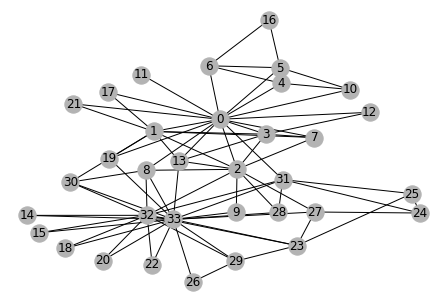

In [ ]:
import networkx as nx
# Since the actual graph is undirected, we convert it for visualization
# purpose.
nx_G = G.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G) # position
print("pos",pos)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

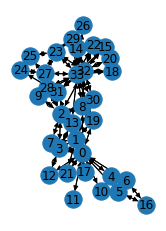

In [ ]:
import matplotlib.pyplot as plt
#plt.subplot(121)
nx.draw(nx_G, with_labels=True)
plt.subplot(122)
nx.draw(dgl.to_networkx(G), with_labels=True)

plt.show()

In [ ]:
# batches node features along the first dimension. The code below adds the learnable
# embeddings for all nodes:

import torch
import torch.nn as nn
import torch.nn.functional as F

embed = nn.Embedding(34, 5)  # 34 nodes with embedding dim equal to 5
G.ndata['MrHi'] = embed.weight

In [ ]:
# print out node 2's input feature
print(G.ndata['MrHi'][2])

# print out node 10 and 11's input features
print(G.ndata['MrHi'][[10, 11]])

tensor([-0.1352, -0.5963,  0.0116,  0.4469, -0.6363], grad_fn=<SelectBackward>)
tensor([[-0.7669,  0.3172, -0.2992,  0.4894, -0.2419],
        [ 0.0347,  0.0979, -1.4517, -1.8486, -0.9508]],
       grad_fn=<IndexBackward>)


In [ ]:
from dgl.nn.pytorch import GraphConv

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_features, hidden_size, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_features, hidden_size)
        self.conv2 = GraphConv(hidden_size, num_classes)

    def forward(self, g, inputs):
        h = self.conv1(g, inputs)
        h = torch.relu(h)
        h = self.conv2(g, h)
        return h

# The first layer transforms input features of size of 5 to a hidden size of 5. [34x5] [5x2] [2x1]
# The second layer transforms the hidden layer and produces output features of
# size 2, corresponding to the two groups of the karate club.
net = GCN(5, 5, 2)

In [ ]:
inputs = embed.weight
labeled_nodes = torch.tensor([0, 33])  # only the instructor and the president nodes are labeled
labels = torch.tensor([0, 1])  # their labels are different
labels

tensor([0, 1])

In [ ]:
import itertools

optimizer = torch.optim.Adam(itertools.chain(net.parameters(), embed.parameters()), lr=0.01)
all_logits = []
for epoch in range(500):
    logits = net(G, inputs)
    # we save the logits for visualization later
    all_logits.append(logits.detach())
    logp = F.log_softmax(logits, 1)
    # we only compute loss for labeled nodes
    loss = F.nll_loss(logp[labeled_nodes], labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
      print('Epoch %d | Loss: %.4f' % (epoch, loss.item()))

Epoch 0 | Loss: 0.7647
Epoch 100 | Loss: 0.0110
Epoch 200 | Loss: 0.0005
Epoch 300 | Loss: 0.0002
Epoch 400 | Loss: 0.0001


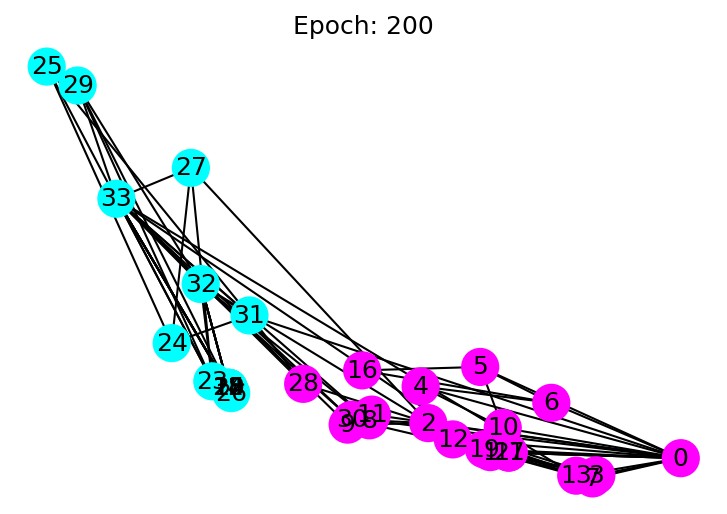

In [ ]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def draw(i):
    cls1color = '#00FFFF'
    cls2color = '#FF00FF'
    pos = {}
    colors = []
    for v in range(34):
        pos[v] = all_logits[i][v].numpy()
        cls = pos[v].argmax()
        colors.append(cls1color if cls else cls2color)
    ax.cla()
    ax.axis('off')
    ax.set_title('Epoch: %d' % i)
    nx.draw_networkx(nx_G.to_undirected(), pos, node_color=colors,
            with_labels=True, node_size=300, ax=ax)
fig = plt.figure(dpi=150)
fig.clf()
ax = fig.subplots()
draw(100)  # draw the prediction of the first epoch
draw(150)
draw(200)
#plt.close()

In [ ]:
ani = animation.FuncAnimation(fig, draw, frames=len(all_logits), interval=200)
ani.to_html5_video()